[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]
RandomState(MT19937)
[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


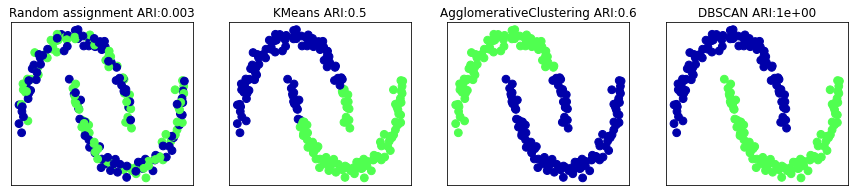

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#print(y)
#rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

#make a list of algorithms to use

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

#create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
#print(random_state)
random_cluster = random_state.randint(low=0, high=2, size=len(X))
#print(random_cluster)
axes[0].scatter(X[:, 0], X[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment ARI:{:.1}".format(adjusted_rand_score(y, random_cluster)))

for ax, alg in zip(axes[1: ], algorithms):
    clusters = alg.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} ARI:{:.1}".format(alg.__class__.__name__, adjusted_rand_score(y, clusters)))


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

#these two labelings of points corresponds to same clustering
cluster1 = [0, 0, 1, 1, 0, 0, 0]
cluster2 = [1, 1, 0, 0, 1, 1, 1]

#the accuracy score is 0 as none match the same
print("Accuracy score:{}".format(accuracy_score(cluster1, cluster2)))

#the adjusted_rand_score is one as both the clustering is the same. All the points of one cluster are marked the same
print("Adjusted rand score:{}".format(adjusted_rand_score(cluster1, cluster2)))

#Thus for measuring the prediction of clustering algorithms, always avoid accuracy_score

Accuracy score:0.0
Adjusted rand score:1.0


C:\Users\Programmer\AppData\Local\Temp\ipykernel_23716\632021862.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


unique labels:[-1]
unique labels:[-1  0  1  2  3]
Number of points per cluster:[1150  903    4    3    3]
mask:[False False False ... False False False]
labels:[-1 -1 -1 ... -1 -1 -1]
cluster:0
mask:[False False False ... False False False]
labels:[-1 -1 -1 ... -1 -1 -1]
cluster:1
mask:[False False False ... False False False]
labels:[-1 -1 -1 ... -1 -1 -1]
cluster:2
Cluster count for each:[14 17  5 26 22 15 25 29 27 36 37 37 26 17 33 28 19 25  4 15 31 19 22  6
 15 24 17 23 22 15 15 10 22 18 22 46 36  3 31 31 27 23 19 15 26 29 23  6
 20  4 28 10 28 17 11 10 31 16  8 21 18 35 19 11 37 22 21 17  9  8 21 31
  6 37 11 32 41 16  3  2 27  9 18 16  6 16 47  4 28 20 26 30 39 26  3  3
 35 18 12 26]
cluster count:[ 43  63  87 141  40  85  48  40  85  63  52 105  79  32  74  49  32  35
  19  61  54  27  63  42  61  13  43  79  63  78  50  10  57  41  18  33
  17  37  16  28]
adjusted_rand_score for labels_km and labels_agg:0.2


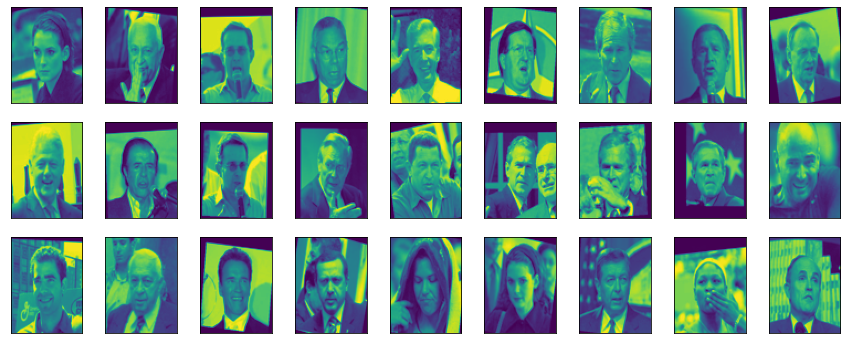

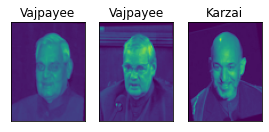

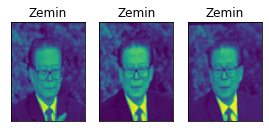

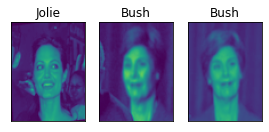

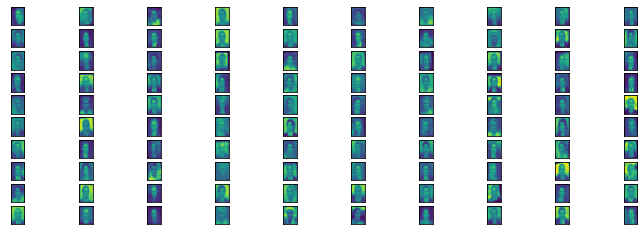

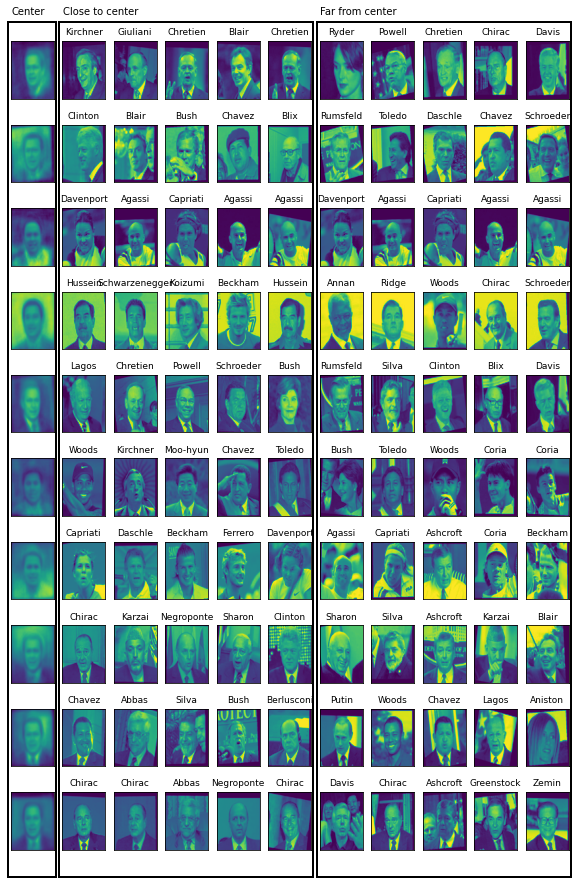

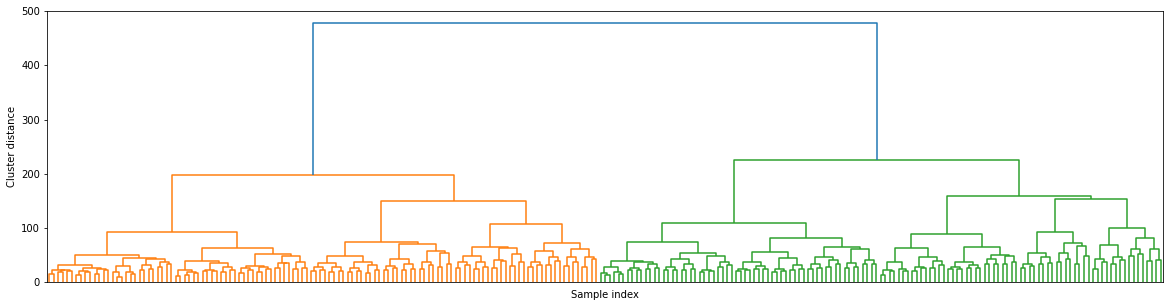

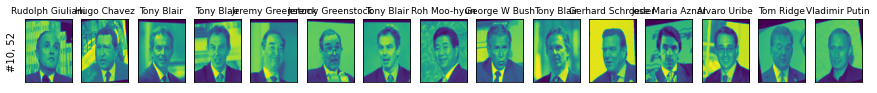

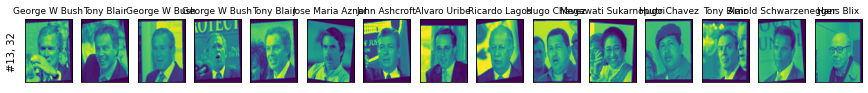

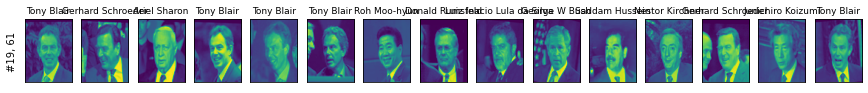

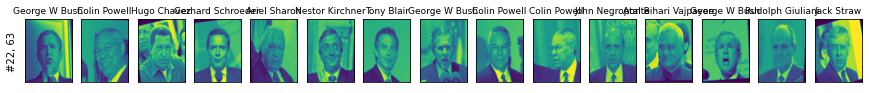

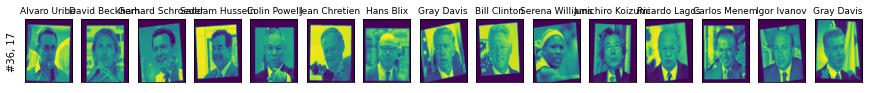

In [33]:
#extract eigen faces from lfw data and transform data
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, ward

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape

people_target_shape = people.target.shape

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

#applying pca
pca = PCA(n_components=100, random_state=0)
pca.fit(X_people)
X_pca = pca.transform(X_people)

#applying dbscan to find clusters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_people)
#print unique labels or in other words, number of clusters
print("unique labels:{}".format(np.unique(labels)))
#if it prints only -1 it means that dbscan labelled every point as a noise
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_people)
#print unique labels or in other words, number of clusters
print("unique labels:{}".format(np.unique(labels)))

#count the number of points in clusters and noise
#bincount doesnt allow negative numbers, so we need to add one
#the first number in the result corresponds to the noise
print("Number of points per cluster:{}".format(np.bincount(labels+1)))

noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, figsize=(15, 6), subplot_kw={'xticks':(), 'yticks':()})

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for clusters in range(max(labels)+1):
    mask = labels == clusters
    print('mask:{}'.format(mask))
    print("labels:{}".format(labels))
    print("cluster:{}".format(clusters))
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images*1.5, 4), subplot_kw={'xticks':(), 'yticks':()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        
#extraxt faces using kmeans
kmeans = KMeans(n_clusters=100)
labels_km = kmeans.fit_predict(X_pca)
print("Cluster count for each:{}".format(np.bincount(labels_km)))

fig, axes = plt.subplots(10, 10, figsize=(12, 4), subplot_kw={'xticks':(), 'yticks':()})

for center, ax in zip(kmeans.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)
    
mglearn.plots.plot_kmeans_faces(kmeans, pca, X_pca, X_people, y_people, people.target_names)

#extract faces using agglomerative clustering
agg = AgglomerativeClustering(n_clusters=40)
labels_agg = agg.fit_predict(X_pca)
print("cluster count:{}".format(np.bincount(labels_agg)))

print("adjusted_rand_score for labels_km and labels_agg:{:.1}".format(adjusted_rand_score(labels_km, labels_agg)))

linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels='False')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, figsize=(15, 4), subplot_kw={'xticks':(), 'yticks':()})
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}, {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label], fontdict={'size':9})
    for i in range(cluster_size, 15):
        axes[0].set_visible(False)